In [1]:
import numpy as np
import sys,os
ia898path = os.path.abspath('/home/lotufo')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia
from math import pi, sin, cos, atan
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.colors as pltc

In [53]:
def iamosaic(f,N,s=1.0):
    h,w,d = f.shape
    print(f.shape)
    nLines = np.ceil(d/N)
    nCells = int(nLines*N)
    # Add black slices to match the exact number of mosaic cells
    fullf = np.resize(f, (nCells,h,w))
    fullf[d:nCells,:,:] = 0
    Y,X = np.indices((int(nLines)*h,N*w))
    Pts = np.array([
            (np.floor(Y/h)*N + np.floor(X/w)).ravel(),
            np.mod(Y,h).ravel(),
            np.mod(X,w).ravel() ]).astype(int).reshape((3,int(nLines*h),int(N*w)))
    g = fullf[Pts[0],Pts[1],Pts[2]]
    if (s != 1.0):
        g = scipy.ndimage.interpolation.zoom(g,s,order=5)
        #g = scipy.misc.imresize(g,s,interp='bilinear')
    return g

(257, 256, 3)


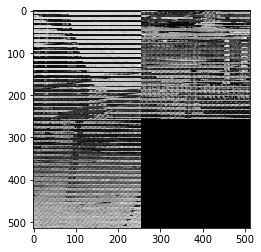

In [58]:
f=mpimg.imread('../../lotufo/ia898/data/boat.tif')
g=iamosaic(f,2,s=1.0)
plt.imshow(g,cmap='gray')